In [5]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from utils.kernelDensityEst import KernelDensityEstimator

In [7]:
np.random.seed(0)
N = 100
data = np.hstack([
    np.random.normal(loc=0, scale=1, size=N // 3),
    np.random.normal(loc=5, scale=1, size=2 * N // 3)
])

x_grid = np.linspace(-6, 16, 500)
h = 1.06 * np.std(data) * N ** (-1 / 5)  # bandwidth Silverman's rule

true_pdf = 1 / 3 * norm.pdf(x_grid, loc=0, scale=1) + 2 / 3 * norm.pdf(x_grid, loc=5, scale=1)

kernel_names = ['gaussian', 'epanechnikov', 'logistic']

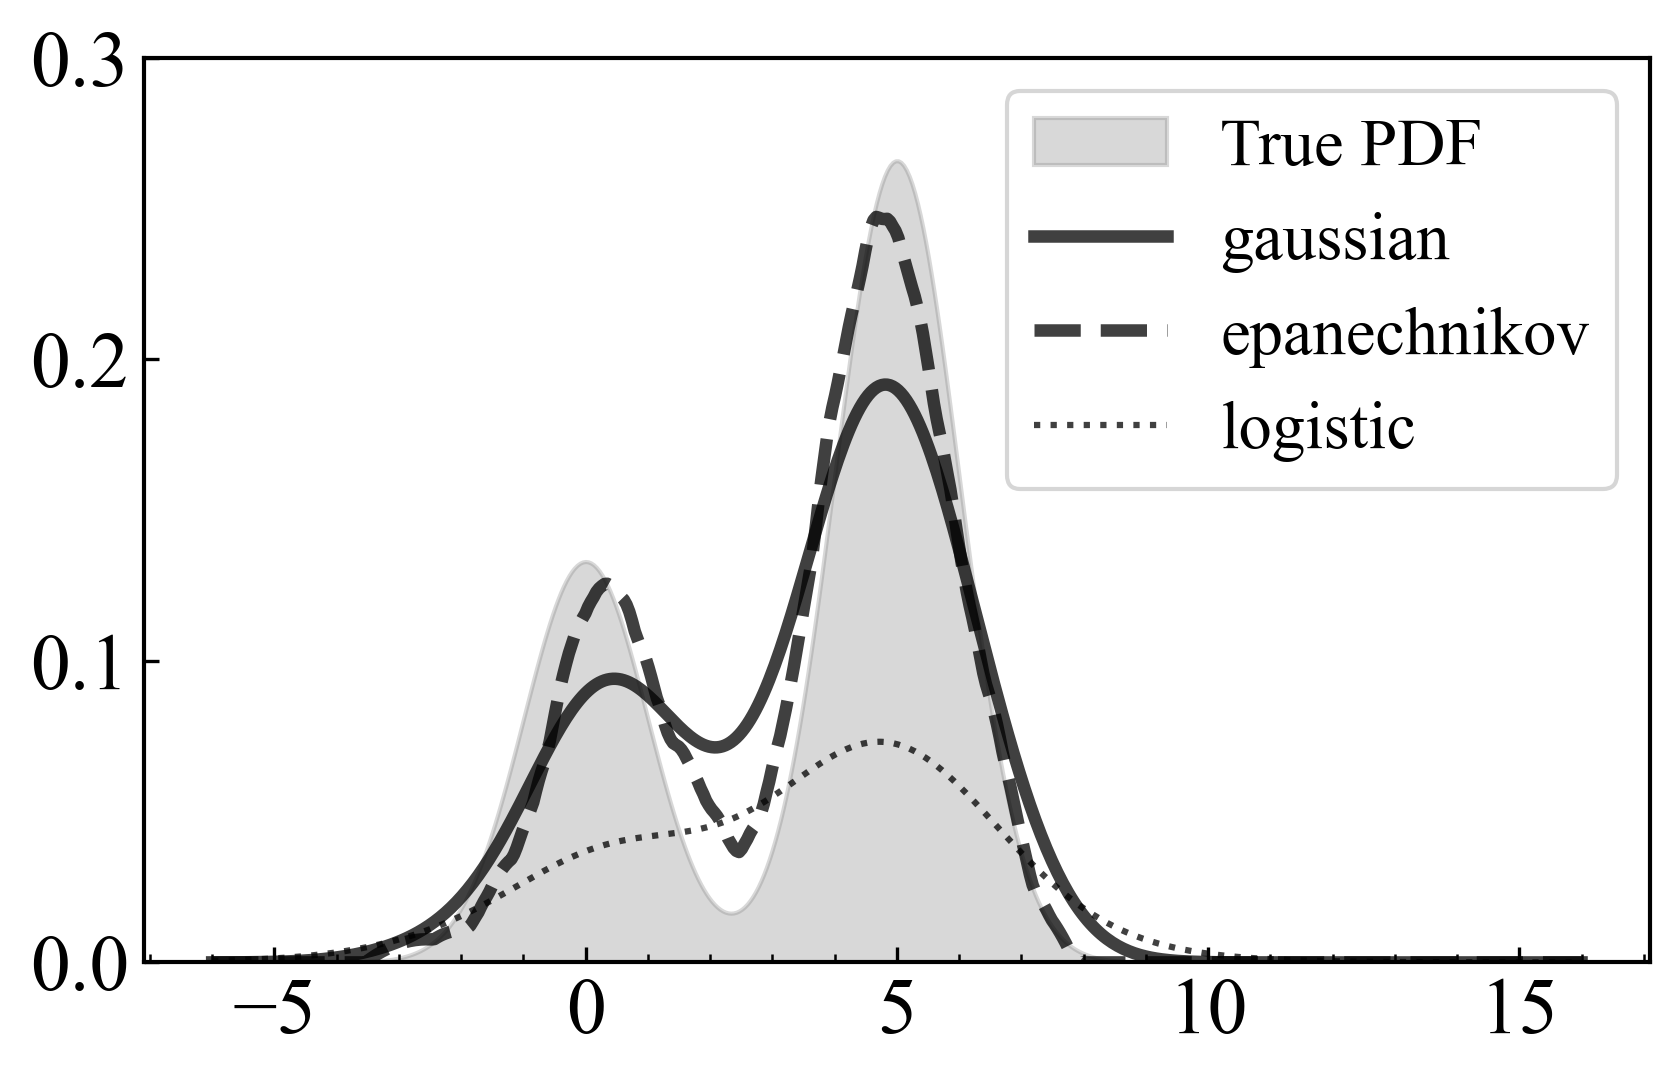

In [8]:
# === Vẽ ===
from utils.vis import temp
plt.figure(figsize=(6, 4))
temp(20)

plt.fill_between(x_grid, true_pdf, color='gray', alpha=0.3, label='True PDF')

for name in kernel_names:
    kde = KernelDensityEstimator(bandwidth=h, kernel=name)
    kde.fit(data)
    y_kde = kde.evaluate(x_grid)

    if name == 'gaussian':
        ls, lw = '-', 3
    elif name == 'epanechnikov':
        ls, lw = '--', 3
    elif name == 'logistic':
        ls, lw = ':', 1.5

    plt.plot(x_grid, y_kde, color='black', linestyle=ls, linewidth=lw, alpha=0.75, label=name)

plt.legend(loc='upper right', fontsize=16)
plt.ylim(0, 0.3)
plt.tight_layout()